In [3]:
%tensorflow_version 2.x
!pip install tensorflow_text

     |████████████████████████████████| 8.3MB 2.8MB/s 


In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import tensorflow_text

questions = ["What is your age?"]
responses = ["I am 20 years old.", "good morning"]
response_contexts = ["I will be 21 next year.", "great day."]

module = hub.load('https://tfhub.dev/google/universal-sentence-encoder-multilingual-qa/3')

question_embeddings = module.signatures['question_encoder'](
            tf.constant(questions))
response_embeddings = module.signatures['response_encoder'](
        input=tf.constant(responses),
        context=tf.constant(response_contexts))

np.inner(question_embeddings['outputs'], response_embeddings['outputs'])

array([[0.40884 , 0.088774]], dtype=float32)

In [0]:
questions = ["my cat is ill", "my cat is sick", "the stock market is falling"]

k = module.signatures['question_encoder'](tf.constant(questions))["outputs"].numpy()

In [26]:
k

array([[ 0.04240151,  0.0198145 , -0.03530068, ...,  0.0127327 ,
         0.04014392,  0.01131673],
       [ 0.04793644,  0.02020789, -0.03736337, ...,  0.0095732 ,
         0.04824064,  0.01227897],
       [ 0.06129157, -0.08382628, -0.03145323, ..., -0.00219322,
        -0.03664872,  0.03972305]], dtype=float32)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

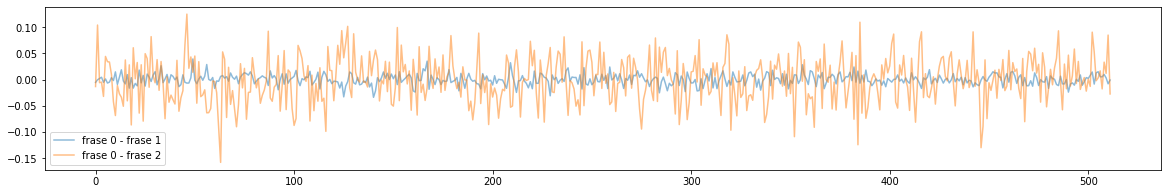

In [25]:
plt.figure(figsize=(20,3))
plt.plot(k[0]-k[1], alpha=0.5, label="frase 0 - frase 1")
plt.plot(k[1]-k[2], alpha=0.5, label="frase 0 - frase 2")

plt.legend();